# QY analysis

This notebook will document the analysis of the QY data taken in the first week of August 2016.

We have managed to take secondary standard data, but there is significant LAB emission.

It may be possible to fit this out using the LAB only spectrum.

In [2]:
pylab
import FluorSpec.PTI_Data
import os
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
def ReadUVVIS_nocorr(path, celllength=1):
    data = np.genfromtxt(path, delimiter=" ", skip_header=2)
    if len(np.shape(data)) != 2:
        data = np.genfromtxt(path, delimiter="\t", skip_header=2)
    if len(np.shape(data)) != 2:
        print("Couldn't read data file!")
        return []
    data = np.transpose(data)
    data[1] = -np.log(10**(-data[1]))/celllength
    #data[1] = np.multiply(data[1], 1/celllength) #normalise to 1/cm units.
    #AbsAt600 = 0.002018 #cm, from Segelstien.#0.00231 #cm, from Daya Bay
    #normidx = np.searchsorted(data[0], 600)
    #minval = min(data[1])
    #data[1] = np.add(data[1], AbsAt600 - data[1][normidx])
    return data


Initializing PTI_Data at Wed Aug 17 13:52:42 2016
Initializing PTI_Data at Wed Aug 17 13:52:42 2016
Initializing PTI_Data at Wed Aug 17 13:52:42 2016
Initializing PTI_Data at Wed Aug 17 13:52:43 2016
Initializing PTI_Data at Wed Aug 17 13:52:43 2016
Initializing PTI_Data at Wed Aug 17 13:52:43 2016


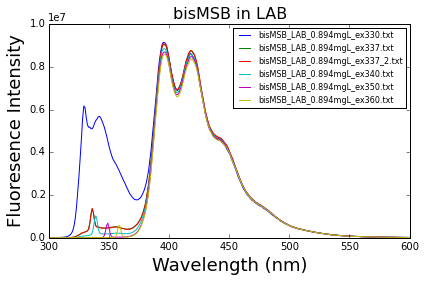

In [4]:
mypath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\Henry\\Emission\\bisMSBlab\\"
UVpath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\UVVIS_160805\\MSBlab\\"
UVdata = ReadUVVIS_nocorr(UVpath + "0.894mgMSBlab.txt")
bisMSBinLABfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
bisMSBinLAB = [FluorSpec.PTI_Data.PTI_Data(mypath + f) for f in bisMSBinLABfiles]
fig = plt.figure()
[plot(f.WL, np.array(f.FileSpecCorrected)/(1-10**-UVdata[1][np.searchsorted(UVdata[0], f.ExRange[0])]), 
      label=f.FilePath.split('\\')[-1]) 
 for f in bisMSBinLAB]
legend(fontsize=8)
xlabel('Wavelength (nm)', fontsize=18)
ylabel('Fluoresence Intensity', fontsize=18)
title('bisMSB in LAB', fontsize=16)
tight_layout()

## bis-MSB comments

- Clearly, there is some LAB emission at short wavelength excitations.

- For simplicity, it may be easiest to consider only the 350 nm and 360 nm excitations first.

- In this paper (https://arxiv.org/pdf/1506.00240v1.pdf), they similarly limit the range to 345 nm.

- In this paper (http://dayawane.ihep.ac.cn/twiki/pub/Public/DybPublications/2010_CPC_XiaoHL-0015.pdf), they don't measure the QY of PPO in LAB, rather they measure the QY of PPO in cyclohexane (to avoid absorption-dependent effects).

- What is encouraging about these data is that the bis-MSB emission does not appear to change its intensity by very much, if you account for the LAB emission. This suggests that the effect of the attenuation over the cuvette length is small.

Initializing PTI_Data at Wed Aug 17 13:52:46 2016
Initializing PTI_Data at Wed Aug 17 13:52:46 2016
Initializing PTI_Data at Wed Aug 17 13:52:46 2016


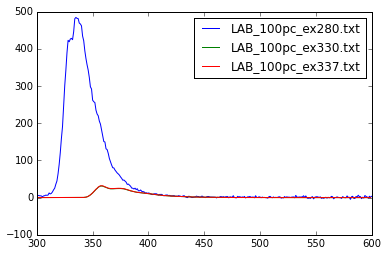

In [5]:
mypath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\Henry\\Emission\\lab\\"
#UVpath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\UVVIS_160805\\MSBlab\\"
#UVdata = ReadUVVIS_nocorr(UVpath + "0.894mgMSBlab.txt")
LABfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
LAB = [FluorSpec.PTI_Data.PTI_Data(mypath + f) for f in LABfiles]
[plot(f.WL, np.array(f.FileSpecCorrected)/(f.FileSpecCorrected[150]), label=f.FilePath.split('\\')[-1]) for f in LAB]
legend(fontsize=12)

Initializing PTI_Data at Wed Aug 17 13:52:48 2016
Initializing PTI_Data at Wed Aug 17 13:52:48 2016
Initializing PTI_Data at Wed Aug 17 13:52:48 2016
Initializing PTI_Data at Wed Aug 17 13:52:48 2016
Initializing PTI_Data at Wed Aug 17 13:52:48 2016
Initializing PTI_Data at Wed Aug 17 13:52:48 2016
Initializing PTI_Data at Wed Aug 17 13:52:48 2016
Initializing PTI_Data at Wed Aug 17 13:52:48 2016


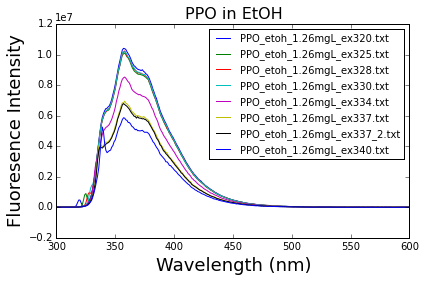

In [6]:
mypath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\Henry\\Emission\\PPOetoh\\Aug4\\"
UVpath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\UVVIS_160805\\PPOetoh\\Aug5\\"
UVfile = UVpath + "1pt26mgPPOetoh.txt"
UVdata = ReadUVVIS_nocorr(UVfile)
PPOinEtOHfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
dilutePPOinEtOHfiles = [f for f in PPOinEtOHfiles if '1.26' in f]
dilutePPOinEtOH = [FluorSpec.PTI_Data.PTI_Data(mypath + f) for f in dilutePPOinEtOHfiles]
fig = plt.figure()
[plot(f.WL, np.array(f.FileSpecCorrected)/(1 - 10**-UVdata[1][np.searchsorted(UVdata[0], f.ExRange[0])]), 
      label=f.FilePath.split('\\')[-1]) 
 for f in dilutePPOinEtOH]
legend(fontsize=10)
xlabel('Wavelength (nm)', fontsize=18)
ylabel('Fluoresence Intensity', fontsize=18)
title('PPO in EtOH', fontsize=16)
tight_layout()

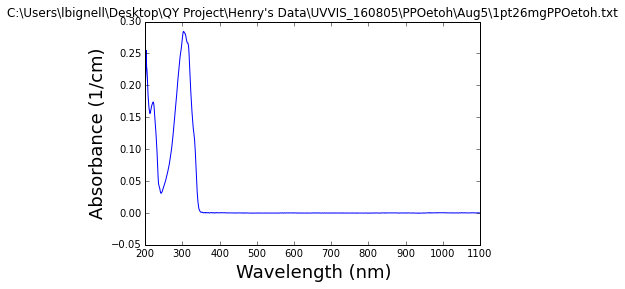

In [7]:
fig = plt.figure()
plot(UVdata[0], UVdata[1])
title(UVfile)
xlabel("Wavelength (nm)", fontsize=18)
ylabel("Absorbance (1/cm)", fontsize=(18))
#tight_layout()

## PPO in EtOH notes

- The Rayleigh scatter peak is clearly visible, which interferes with our ability to determine the fluoresence signal for most measurements.

- Normalising by the absorbance does not correct the fluorescence intensity. So either the QY is increasing (possible for the longer wavelength absorbances), or there is something screwy in the measurement. Given the decent results gotten with the bis-MSB signal (and the similar absorbances of these samples) it is unlikely that the issue is with the attenuation over the cuvette effect. Looking at the absorption spectra, the chief differences with bis-MSB are:

    * The absorption wavelength (if we're correcting the response this shouldn't be important).
    
    * The steepness of the absorbance curve (if there's a wavlength offset this could be the culprit).
    
    * The PPO in EtOH sample appears to not be relative to EtOH? Or is that some other PPO absorbance at short wavelength?

## Let's press on with the analysis...

- Fit the fluoresence spectra with a template spectrum in some range, then integrate in some other range, to remove the influence of Rayleigh peak.

Let's start with the bis-MSB in LAB... Looking at the plot, the 360 nm excitation seems OK with a fit range of 450:550 nm.

In [8]:
import numpy as np
from scipy.optimize import leastsq

class fitter():
    '''
    This class will handle fitting for this analysis.
    '''
    def __init__(self):
        #initialise with (xlow, xhigh) = (150, 250)
        self.xlow = 150
        self.xhigh = 250
        return

    def register_UVdata(self, UVdata):
        self.UVdata = UVdata
        return
    
    def set_template_object(self, template):
        self.template = template
        return
    
    def get_template_object(self):
        return self.template
    
    def set_fit_range(self, xlow, xhigh):
        self.xlow = xlow
        self.xhigh = xhigh
        return

    def ShiftUV_wavelength(self, shift):
        '''
        Shift self.UVdata by some fixed calibration offset.
        '''
        pass
    
    def template_scale(self, factor):
        #This is just setting the fit range, so searchsorted should be OK.
        idx_xlow = np.searchsorted(self.template.WL, self.xlow)
        idx_xhigh = np.searchsorted(self.template.WL, self.xhigh)
        return np.array(self.template.FileSpecCorrected[slice(idx_xlow, idx_xhigh)])\
                *factor/(1 - 10**-self.UVscale(self.template.ExRange[0]))
                         #self.UVdata[1][np.searchsorted(self.UVdata[0], self.template.ExRange[0])])
    
    def UVscale(self, ExWL):
        #searchsorted isn't appropriate here, as we need to know the attenuation length quite well. Linearly interpolating...
        #print("searchsorted: {0}".format(self.UVdata[1][np.searchsorted(self.UVdata[0], ExWL)]))
        #print("interp: {0}".format(np.interp(ExWL, self.UVdata[0], self.UVdata[1])))
        #return self.UVdata[1][np.searchsorted(self.UVdata[0], ExWL)]
        return np.interp(ExWL, self.UVdata[0], self.UVdata[1])
        
    def DoubleGauss(self, x, p):
        #A1, mu1, sigma1, A2, mu2, sigma2 = p
        return p[0]*np.exp(-(x-p[2])**2/(2.*p[3]**2)) + p[1]*np.exp(-(x-p[4])**2/(2.*p[5]**2))

    def fit_function(self, p0, data, function, sigma=None):
                     #cf_func=template_scale, **kwargs):
        
        datax = data.WL
        #Again, searchsorted is fine here as it's just setting the fit range.
        idx_xlow = np.searchsorted(datax, self.xlow)
        idx_xhigh = np.searchsorted(datax, self.xhigh)
        datay = np.array(data.FileSpecCorrected[slice(idx_xlow, idx_xhigh)])/(1-10**-self.UVscale(data.ExRange[0]))
        
        errfunc = lambda p, y: function(p) - y

        ##################################################
        ## 1. COMPUTE THE FIT AND FIT ERRORS USING leastsq
        ##################################################

        # If using optimize.leastsq, the covariance returned is the 
        # reduced covariance or fractional covariance, as explained
        # here :
        # http://stackoverflow.com/questions/14854339/in-scipy-how-and-why-does-curve-fit-calculate-the-covariance-of-the-parameter-es
        # One can multiply it by the reduced chi squared, s_sq, as 
        # it is done in the more recenly implemented scipy.curve_fit
        # The errors in the parameters are then the square root of the 
        # diagonal elements.   

        pfit, pcov, infodict, errmsg, success = \
            leastsq(errfunc, p0, args=(datay), \
                    full_output=1)

        if (len(datay) > len(p0)) and pcov is not None:
            s_sq = (errfunc(pfit, datay)**2).sum()/(len(datay)-len(p0))
            pcov = pcov * s_sq
        else:
            pcov = np.inf

        error = [] 
        for i in range(len(pfit)):
            try:
                error.append( np.absolute(pcov[i][i])**0.5)
            except:
                error.append( 0.00 )
        pfit_leastsq = pfit
        perr_leastsq = np.array(error) 
        return pfit_leastsq, perr_leastsq#pfit_curvefit, perr_curvefit#_bootstrap



[ 0.98580351]
[ 0.00071509]


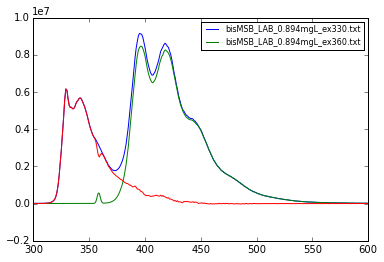

In [9]:
#Test out the fitter.
testspec = bisMSBinLAB[0]
template = bisMSBinLAB[5]
UVpath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\UVVIS_160805\\MSBlab\\"
UVdata = ReadUVVIS_nocorr(UVpath + "0.894mgMSBlab.txt")

ftr = fitter()

ftr.register_UVdata(UVdata)
ftr.set_fit_range(450, 550)
ftr.set_template_object(template)
pfit, perr = ftr.fit_function([1], testspec, ftr.template_scale)
print(pfit)
print(perr)

fig = plt.figure()
plot(testspec.WL, np.array(testspec.FileSpecCorrected)/(1-10**-ftr.UVscale(testspec.ExRange[0])), 
     label=testspec.FilePath.split('\\')[-1])
plot(template.WL, np.array(template.FileSpecCorrected)*pfit[0]/(1-10**-ftr.UVscale(template.ExRange[0])),
     label=template.FilePath.split('\\')[-1])
legend(fontsize=8)
#fig = plt.figure()
plot(testspec.WL, np.array(testspec.FileSpecCorrected)/(1-10**-ftr.UVscale(testspec.ExRange[0])) - 
     np.array(template.FileSpecCorrected)*pfit[0]/(1-10**-ftr.UVscale(template.ExRange[0])), label="difference")

### The difference between the bis-MSB fit and the short wavelength excitation looks suspiciously like the LAB spectrum (less the dip for the Rayleigh spectrum). Yesss!

In [10]:
def calc_signal_spec(testobj, template, fitlow, fithigh, theUVdata):
    ftr = fitter()
    ftr.register_UVdata(theUVdata)
    ftr.set_fit_range(fitlow, fithigh)
    ftr.set_template_object(template)
    pfit, perr = ftr.fit_function([1], testobj, ftr.template_scale)
    return np.array(template.FileSpecCorrected)*pfit[0]/(1-10**-ftr.UVscale(template.ExRange[0]))

In [11]:
def calc_integrals(samplelist, template, intmin, intmax, theUVdata, fitlow, fithigh):
    #This is just setting the integration range, so searchsorted should be fine.
    idx_intmin = np.searchsorted(template.WL, intmin)
    idx_intmax = np.searchsorted(template.WL, intmax)
    fits = [calc_signal_spec(f, template, fitlow, fithigh, theUVdata) for f in samplelist]
    return fits, idx_intmin, idx_intmax

In [12]:
def n2_LAB(WL):
    return 1 + (0.821384/(1-((94.7625/WL)**2))) + (0.311375/(1-((160.751/WL)**2))) + \
        (0.0170099/(1-((219.575/WL)**2))) + (0.608268/(1-((9385.54/WL)**2)))

def n2_EtOH(WL):
    WL_um = WL/1000.
    return 1 + ((WL_um**2)*0.83189)/((WL_um**2) - 0.00930) + ((WL_um**2)*(-0.15582))/((WL_um**2)+49.45200)

# Now see the effect of changing the monochromator calibration by some shift.

 - See the analysis below for how the shifts are worked out.
 - I'm just going to shift everything to true wavelength scale, but not change the correction to the emission spectrum for now.
 - The UV-VIS data needs the following transforms: -1.66 nm (this puts it on the same scale as the excitation mono) + 1.20 nm (sets excitation to absolute scale).
 - The excitation wavelength needs the following transform: + 1.20 nm
 - The emission wavelength needs the following transform: +2.81 nm

In [13]:
%matplotlib qt
mypath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\Henry\\Emission\\bisMSBlab\\"
UVpath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\UVVIS_160805\\MSBlab\\"
UVdata_bisMSBinLAB = ReadUVVIS_nocorr(UVpath + "0.894mgMSBlab.txt")
bisMSBinLABfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
bisMSBinLAB = [FluorSpec.PTI_Data.PTI_Data(mypath + f) for f in bisMSBinLABfiles]

mypath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\Henry\\Emission\\PPOetoh\\Aug4\\"
UVpath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\UVVIS_160805\\PPOetoh\\Aug5\\"
UVfile = UVpath + "1pt26mgPPOetoh.txt"
UVdata_PPOinEtOH = ReadUVVIS_nocorr(UVfile)
PPOinEtOHfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
dilutePPOinEtOHfiles = [f for f in PPOinEtOHfiles if '1.26' in f]
dilutePPOinEtOH = [FluorSpec.PTI_Data.PTI_Data(mypath + f) for f in dilutePPOinEtOHfiles]

mypath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\Henry\\Emission\\PPOlab\\Aug4\\"
UVpath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\UVVIS_160805\\PPOlab\\Aug5\\"
UVdata_PPOlab = ReadUVVIS_nocorr(UVpath + "1.33mgPPOlab.txt")
PPOinLABfiles = [f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
PPOinLAB = [FluorSpec.PTI_Data.PTI_Data(mypath + f) for f in PPOinLABfiles]
dilutePPOinLABfiles = [f for f in PPOinLABfiles if '1.33' in f]
dilutePPOinLAB = [FluorSpec.PTI_Data.PTI_Data(mypath + f) for f in dilutePPOinLABfiles]

#The shift values are taken from the analysis below...
UVShift = - 1.66 + 1.20
ExShift = + 1.20
EmShift = + 2.81

shiftedbisMSBinLAB = bisMSBinLAB
for entry in shiftedbisMSBinLAB:
    entry.ExRange[0] += ExShift
    entry.WL = list(np.array(entry.WL) + EmShift)
    
shiftedPPOinEtOH = dilutePPOinEtOH
for entry in dilutePPOinEtOH:
    entry.ExRange[0] += ExShift
    entry.WL = list(np.array(entry.WL) + EmShift)
    
shiftedPPOinLAB = dilutePPOinLAB
for entry in shiftedPPOinLAB:
    entry.ExRange[0] += ExShift
    entry.WL = list(np.array(entry.WL) + EmShift)

UVdata_bisMSBinLAB[0] = list(np.array(UVdata_bisMSBinLAB[0]) + UVShift)

UVdata_PPOinEtOH[0] = list(np.array(UVdata_PPOinEtOH[0]) + UVShift)

UVdata_PPOlab[0] = list(np.array(UVdata_PPOlab[0]) + UVShift)

Initializing PTI_Data at Wed Aug 17 13:53:08 2016
Initializing PTI_Data at Wed Aug 17 13:53:08 2016
Initializing PTI_Data at Wed Aug 17 13:53:08 2016
Initializing PTI_Data at Wed Aug 17 13:53:08 2016
Initializing PTI_Data at Wed Aug 17 13:53:08 2016
Initializing PTI_Data at Wed Aug 17 13:53:08 2016
Initializing PTI_Data at Wed Aug 17 13:53:08 2016
Initializing PTI_Data at Wed Aug 17 13:53:08 2016
Initializing PTI_Data at Wed Aug 17 13:53:08 2016
Initializing PTI_Data at Wed Aug 17 13:53:08 2016
Initializing PTI_Data at Wed Aug 17 13:53:08 2016
Initializing PTI_Data at Wed Aug 17 13:53:08 2016
Initializing PTI_Data at Wed Aug 17 13:53:08 2016
Initializing PTI_Data at Wed Aug 17 13:53:08 2016
Initializing PTI_Data at Wed Aug 17 13:53:08 2016
Initializing PTI_Data at Wed Aug 17 13:53:08 2016
Initializing PTI_Data at Wed Aug 17 13:53:08 2016
Initializing PTI_Data at Wed Aug 17 13:53:08 2016
Initializing PTI_Data at Wed Aug 17 13:53:08 2016
Initializing PTI_Data at Wed Aug 17 13:53:08 2016


[507069815.926763, 528097850.99771392, 530416663.22969252, 529760193.95899296, 538685986.98007286, 546468379.38761401]
[331.2, 338.2, 338.2, 341.2, 351.2, 361.2]


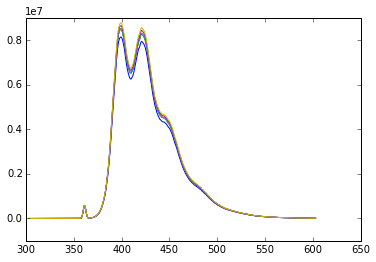

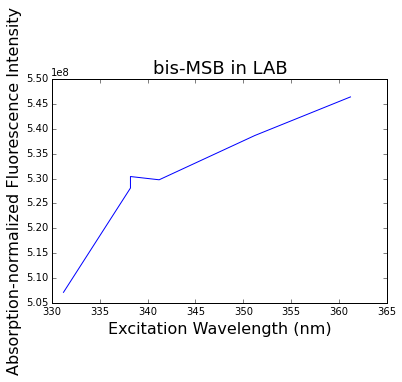

In [14]:
%matplotlib inline
fits, idx_intmin, idx_intmax = calc_integrals(shiftedbisMSBinLAB, shiftedbisMSBinLAB[5], 366, 600,
                                              UVdata_bisMSBinLAB, 450, 550)
fig = plt.figure()
[plot(shiftedbisMSBinLAB[5].WL, thefit - np.mean(thefit[0:20])) for thefit in fits]
#ylim(0,200000)
#xlim(340,380)
fig = plt.figure()
intvals_MSBlab = [sum(thefit[slice(idx_intmin, idx_intmax)] - np.mean(thefit[0:20])) for thefit in fits]
print(intvals_MSBlab)
shiftedExWLvals_MSBlab = [obj.ExRange[0] for obj in shiftedbisMSBinLAB]
print(shiftedExWLvals_MSBlab)
plot(shiftedExWLvals_MSBlab, intvals_MSBlab)
xlabel("Excitation Wavelength (nm)", fontsize=16)
ylabel("Absorption-normalized Fluorescence Intensity", fontsize=16)
title("bis-MSB in LAB", fontsize=18)

### Well at least it looks more-or-less systematic!

### Now to look at PPO in EtOH...

[659116204.97611344, 638037301.72479868, 635782120.21588302, 630054279.58722293, 589426903.13799274, 572737478.69678319, 559776282.9395082, 537648268.07344484]
[321.2, 326.2, 329.2, 331.2, 335.2, 338.2, 338.2, 341.2]


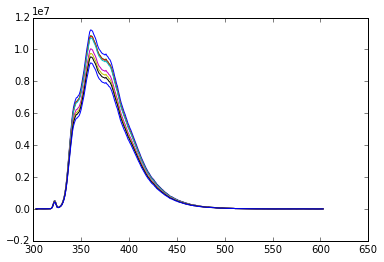

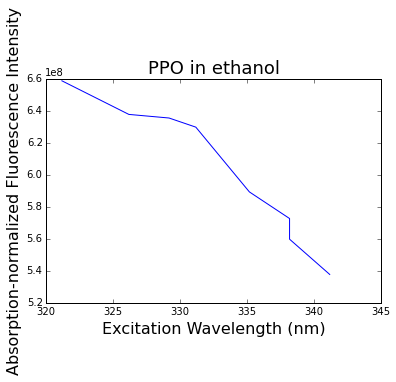

In [15]:
fits, idx_intmin, idx_intmax = calc_integrals(shiftedPPOinEtOH, shiftedPPOinEtOH[0], 325, 600, UVdata_PPOinEtOH, 400, 500)
fig = plt.figure()
[plot(shiftedPPOinEtOH[0].WL, thefit - np.mean(thefit[-21:-1])) for thefit in fits]
#ylim(0,2000000)
#xlim(310, 400)
fig = plt.figure()
intvals_PPOetoh = [sum(thefit[slice(idx_intmin, idx_intmax)] - np.mean(thefit[-21:-1])) for thefit in fits]
print(intvals_PPOetoh)
shiftedExWLvals_PPOetoh = [obj.ExRange[0] for obj in shiftedPPOinEtOH]
print(shiftedExWLvals_PPOetoh)
plot(shiftedExWLvals_PPOetoh, intvals_PPOetoh)
xlabel("Excitation Wavelength (nm)", fontsize=16)
ylabel("Absorption-normalized Fluorescence Intensity", fontsize=16)
title("PPO in ethanol", fontsize=18)

## Now we can combine and calculate QY, assuming bisMSB's QY = 0.926 +/- 0.053

Formula: QY_s = QY_r*(A_r / A_s) (F_s / F_r) n_s^2 / n_r^2

PPO in EtOH QY (330 nm) = 0.9418773200054735 +/- 0.05811292100725982
PPO in EtOH QY (337 nm) = 0.8239051970488772 +/- 0.06181499506158732
PPO in EtOH QY (340 nm) = 0.7716800045779316 +/- 0.08048473927447419


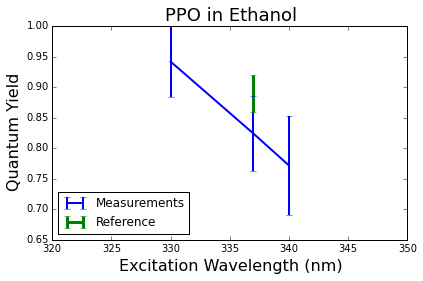

In [16]:
# Overlapping wavelengths: 330 nm, 337 nm, 340 nm
LambdaExVals = [330, 337, 340]
QYvals = []
UQYvals = []
for LambdaEx in LambdaExVals:
    Abs_PPOeth = UVdata_PPOinEtOH[1][np.searchsorted(UVdata_PPOinEtOH[0], LambdaEx + ExShift)]
    Abs_MSBlab = UVdata_bisMSBinLAB[1][np.searchsorted(UVdata_bisMSBinLAB[0], LambdaEx + ExShift)]
    F_PPOeth = intvals_PPOetoh[np.searchsorted(shiftedExWLvals_PPOetoh, LambdaEx + ExShift)]
    F_MSBlab = intvals_MSBlab[np.searchsorted(shiftedExWLvals_MSBlab, LambdaEx + ExShift)]
    QY_MSBlab = 0.926
    UQY_MSBlab = 0.053

    #DON'T INCLUDE THE ABSORPTION IN THIS FORMULA AS IT IS ALREADY DONE ABOVE!!
    QY_PPOetoh = QY_MSBlab*(F_PPOeth/F_MSBlab)*(n2_EtOH(LambdaEx + ExShift)\
                                                / n2_LAB(LambdaEx + ExShift))#*(Abs_MSBlab/Abs_PPOeth)

    UQY_PPOetoh = np.sqrt((UQY_MSBlab/QY_MSBlab)**2 + (0.001/Abs_PPOeth)**2 + (0.001/Abs_MSBlab)**2
                          + (np.sqrt(F_MSBlab)/F_MSBlab)**2 + (np.sqrt(F_PPOeth)/F_PPOeth)**2)

    print("PPO in EtOH QY ({2} nm) = {0} +/- {1}".format(QY_PPOetoh, UQY_PPOetoh, LambdaEx))
    QYvals += [QY_PPOetoh]
    UQYvals += [UQY_PPOetoh]

fig = plt.figure()
errorbar(LambdaExVals, QYvals, yerr=UQYvals, label='Measurements', linewidth=2)
errorbar(337, 0.89, yerr=0.03, label='Reference', linewidth=3)
legend(loc='lower left')
xlim(320, 350)
xlabel("Excitation Wavelength (nm)", fontsize=16)
ylabel("Quantum Yield", fontsize=16)
title("PPO in Ethanol", fontsize=18)
tight_layout()

# Important things learned from this analysis:

- The wavelength shift makes an enormous difference.

- I was already normalising the fluorescence spectra using the absorbance values, so applying it twice screwed up my results.

- Linearly interpolating the absorbance spectrum is important, because it changes so rapidly with wavelength.

- It seems likely that the observed wavelength dependence of the QY is due to some systematic in the shift value. A shift of 2.3 nm (instead of 1.66 nm) between the excitation monochromator and the UV-VIS is enough to make the QY flat. It also minimises the difference between the absorption-normalised fluorescence intensity (which is an equivalent statement). It's tempting to argue that we should just optimise the flatness of the QY as this is the expected behaviour, though I think it would be better to instead measure the wavelength more precisely (if possible). Alternatively we could measure at longer wavelengths where the absorbance doesn't change so rapidly with wavelength...

- The uncertainty in the QY reference seems to be the leading component of the overall uncertainty, followed by the uncertainty in the absorbance. So it's important to get precise absorbance measurements.

- Further improvements could be to try and fit out the Rayleigh scatter peak from the template spectrum.

# PPO in LAB measurements

- I can use both QY standards for the analysis.

- Fitting out the LAB spectrum may be a pain.

- The data are imported about 5 code blocks above this

(300, 600)

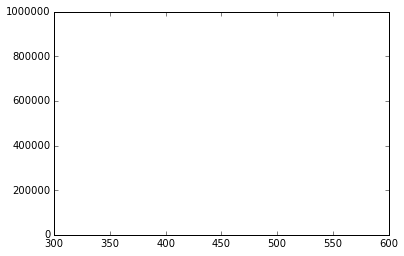

In [17]:
figure(8)
ylim(0,1000000)
xlim(300, 600)

In [18]:
fig = plt.figure()
[plot(meas.WL, np.array(meas.FileSpecCorrected)/(1-10**-np.interp(meas.ExRange[0], UVdata_PPOlab[0], UVdata_PPOlab[1])), 
      label=meas.FilePath.split('\\')[-1]) 
 for meas in shiftedPPOinLAB]
legend(fontsize=8)
xlabel('Wavelength (nm)', fontsize=18)
ylabel('Fluoresence Intensity', fontsize=18)
title('PPO in LAB\n(normalised to PPO absorbance)', fontsize=16)
tight_layout()
ylim(0,30000000)

print([meas.FilePath.split('\\')[-1] for meas in PPOinLAB])
fig = plt.figure()
[plot(meas.WL, np.array(meas.FileSpecCorrected),#/(meas.FileSpecCorrected[150]), 
      label=meas.FilePath.split('\\')[-1]) 
 for meas in PPOinLAB[21:32]]
legend(fontsize=8)
xlabel('Wavelength (nm)', fontsize=18)
ylabel('Fluoresence Intensity', fontsize=18)
title('PPO in LAB, 2 g/L', fontsize=16)
tight_layout()

ftr_ppolab = fitter()
template = PPOinLAB[23]
ftr_ppolab.register_UVdata(UVdata_PPOlab)
ftr.set_fit_range(400, 500)
ftr.set_template_object(template)
fitfuncresults = [ftr.fit_function([1], testspec, ftr.template_scale) for testspec in shiftedPPOinLAB]
print(fitfuncresults)

fig = plt.figure()
[plot(meas.WL, np.array(meas.FileSpecCorrected)/(1-10**-np.interp(meas.ExRange[0], UVdata_PPOlab[0], UVdata_PPOlab[1])), 
      label=meas.FilePath.split('\\')[-1]) 
[plot(template.WL, np.array(template.FileSpecCorrected)*fitfuncresults[i][0],
     label=template.FilePath.split('\\')[-1])
legend(fontsize=8)
#fig = plt.figure()
plot(testspec.WL, np.array(testspec.FileSpecCorrected)/(1-10**-ftr.UVscale(testspec.ExRange[0])) - 
     np.array(template.FileSpecCorrected)*pfit[0]/(1-10**-ftr.UVscale(template.ExRange[0])), label="difference")

SyntaxError: invalid syntax (<ipython-input-18-d9fea9d7c932>, line 36)

## So the 2 g/L samples may be ok as a template for the PPO component.

# Wavelength Calibration

- The shifts can be worked out, starting with the emission monochromator and fluorescent lights, then the excitation monochromator (passing the signal through the emission monochromator), then the UV-VIS (by comparing the bandpass filter).


In [19]:
from scipy.optimize import curve_fit

def Gauss_cf(x, p):
    return p[0]*np.exp(-(x-p[1])**2/(2.*p[2]**2))

def DoubleGauss_cf(x, p):
    return p[0]*np.exp(-(x-p[1])**2/(2.*p[2]**2)) + p[3]*np.exp(-(x-p[4])**2/(2.*p[5]**2))

def TripleGauss_cf(x, p):
    return p[0]*np.exp(-(x-p[1])**2/(2.*p[2]**2)) + p[3]*np.exp(-(x-p[4])**2/(2.*p[5]**2)) + \
           p[6]*np.exp(-(x-p[7])**2/(2.*p[8]**2))

def FiveGauss_cf(x,p):
    return p[0]*np.exp(-(x-p[1])**2/(2.*p[2]**2)) + p[3]*np.exp(-(x-p[4])**2/(2.*p[5]**2)) + \
           p[6]*np.exp(-(x-p[7])**2/(2.*p[8]**2)) + p[9]*np.exp(-(x-p[10])**2/(2.*p[11]**2)) + \
           p[12]*np.exp(-(x-p[13])**2/(2.*p[14]**2))

def subtractBL(x, y, avglen):
    '''
    Linearly interpolate under a peak.
    '''
    yfit = y[0:avglen] + y[-avglen:]
    xfit = x[0:avglen] + x[-avglen:]
    m,b = np.polyfit(xfit, yfit, 1)
    BL = np.multiply(m,x) + b
    return BL, y - BL

def fit_function(p0, x, y, function, sigma=None):    
        errfunc = lambda p, x, y: function(x, p) - y

        pfit, pcov, infodict, errmsg, success = \
            leastsq(errfunc, p0, args=(x,y), \
                    full_output=1)

        if (len(y) > len(p0)) and pcov is not None:
            s_sq = (errfunc(pfit, x, y)**2).sum()/(len(y)-len(p0))
            pcov = pcov * s_sq
        else:
            pcov = np.inf

        error = [] 
        for i in range(len(pfit)):
            try:
                error.append( np.absolute(pcov[i][i])**0.5)
            except:
                error.append( 0.00 )
        pfit_leastsq = pfit
        perr_leastsq = np.array(error) 
        return pfit_leastsq, perr_leastsq

def fitpeak(x, y, fitlowWL, fithighWL, model, paramguess, avglen=3, makefigs=False):
    '''
    Fit a peak in data within a certain fitregion (slice), using a fit model with initial paramguess.
    Returns the fit parameters and uncertainty.
    '''
    lowidx = x.index(fitlowWL)
    highidx = x.index(fithighWL)
    fitslice = slice(lowidx, highidx)
    datax = x[fitslice]
    datay = y[fitslice]
    datayerrors = np.sqrt(datay)
    BL, datay_corr = subtractBL(datax, datay, avglen)
    if makefigs:
        fig = plt.figure()
        plot(datax, datay, label='original')
        plot(datax, BL, label='baseline')
        plot(datax, datay_corr, label='BL corrected')
        plt.xlabel("Wavelength (nm)", fontsize=16)
        plt.ylabel("Fluorescence Intensity", fontsize=16)
        legend()

    print("Fitting peak: param guess = {0}, model = {1}".format(paramguess, model))
    pfit, pcov = fit_function(paramguess, datax, datay_corr, model, datayerrors)
    print("success! Parameters: {0}".format(pfit))
    if makefigs:
        xvals = np.linspace(min(datax), max(datax), 1000)
        yvals = model(xvals, pfit)
        plot(xvals, yvals, label='Fit')
        if len(pfit)==3:
            title("Fit values:\nmean = {0:.2f} nm, std = {1:.2f} nm".format(pfit[1], pfit[2]), fontsize=18)
        else:
            title("Fit values:\nmean = {0:.2f} nm, std = {1:.2f} nm\nmean = {2:.2f}, std = {3:.2f}"\
                  .format(pfit[1], pfit[2], pfit[4], pfit[5]), fontsize=18)
        legend()

    return pfit, pcov

Initializing PTI_Data at Wed Aug 17 13:53:31 2016
CWT wavelet approach...
Peaks found at: [402.0, 433.0, 487.0, 542.0]
Fitting peak: param guess = [20000, 402, 2], model = <function Gauss_cf at 0x0000000008E050D0>
success! Parameters: [  2.41250234e+04   4.01842484e+02   9.89412255e-01]
Fitting peak: param guess = [140000, 433, 2], model = <function Gauss_cf at 0x0000000008E050D0>
success! Parameters: [  1.53398837e+05   4.32639091e+02   9.86704159e-01]
Fitting peak: param guess = [100000, 538, 2, 140000, 544, 2, 40000, 548, 2], model = <function TripleGauss_cf at 0x0000000008E85A60>
success! Parameters: [  8.09781413e+04   5.40293701e+02   1.65396771e+00   6.56216659e+04
   5.43065186e+02   1.00737843e+00   3.56106903e+04   5.43488373e+02
   4.75547515e+00]


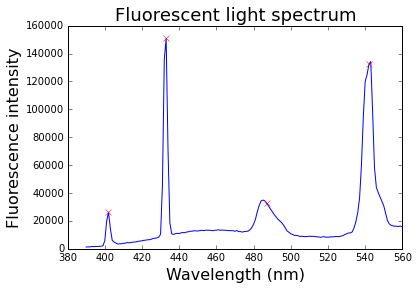

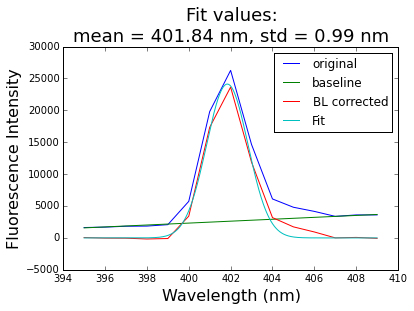

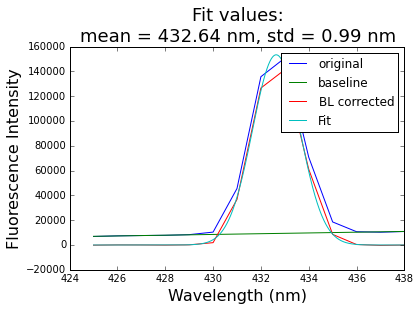

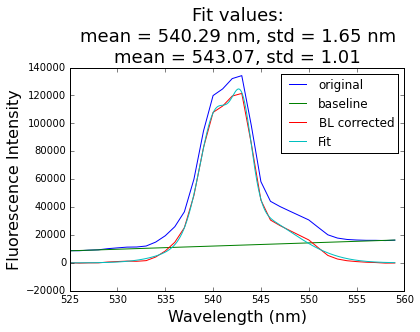

In [20]:
#%matplotlib qt4#Qt4Agg
from scipy.signal import find_peaks_cwt

mypath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\Henry\\FluoLights_2nm_160808.txt"
FluoLight = FluorSpec.PTI_Data.PTI_Data(mypath)
fig = figure()
plot(FluoLight.WL, FluoLight.FileSpecCorrected)
pk_ind = find_peaks_cwt(FluoLight.FileSpecCorrected, np.arange(7,8))
pk_WL =[FluoLight.WL[val] for val in pk_ind]
print("CWT wavelet approach...\nPeaks found at: {0}".format(pk_WL))
pk_sig = [FluoLight.FileSpecCorrected[val] for val in pk_ind]
plot(pk_WL, pk_sig, 'rx', linewidth=3)
#xlim(425,439)
xlabel("Wavelength (nm)", fontsize=16)
ylabel("Fluorescence intensity", fontsize=16)
title("Fluorescent light spectrum", fontsize=18)

startranges = [395, 425, 525]
endranges = [410, 439, 560]
paramguesses = [[20000, 402, 2], [140000, 433, 2], [100000, 538, 2, 140000, 544, 2, 40000, 548, 2]]
models = [Gauss_cf, Gauss_cf, TripleGauss_cf]
#pfit, pcov = fitpeak(FluoLight.WL, FluoLight.FileSpecCorrected, 395, 410, Gauss_cf, [20000, 402, 5], makefigs=True)
fitreturn = [fitpeak(FluoLight.WL, FluoLight.FileSpecCorrected, startranges[i], endranges[i], 
                        models[i], paramguesses[i], makefigs=True) for i in range(3)]


# Now compare to the 'real' Hg lamp values...

Taken from this website: http://physics.nist.gov/PhysRefData/Handbook/Tables/mercurytable2.htm

In [21]:
#Expected WL
Expected_WL = [404.6563, 435.8328, 542.5253, 546.0735]
print("First peak difference: {0} nm".format(fitreturn[0][0][1] - Expected_WL[0]))
print("Second peak difference: {0} nm".format(fitreturn[1][0][1] - Expected_WL[1]))
print("Third peak difference: {0} nm".format(fitreturn[2][0][1] - Expected_WL[2]))
print("Fourth peak difference: {0} nm".format(fitreturn[2][0][4] - Expected_WL[3]))
EmMonoOffset = sum([fitreturn[0][0][1] - Expected_WL[0], fitreturn[1][0][1] - Expected_WL[1],
                       fitreturn[2][0][1] - Expected_WL[2], fitreturn[2][0][4] - Expected_WL[3]])/4
UEmMonoOffset = np.std([fitreturn[0][0][1] - Expected_WL[0], fitreturn[1][0][1] - Expected_WL[1],
                       fitreturn[2][0][1] - Expected_WL[2], fitreturn[2][0][4] - Expected_WL[3]])
print("Mean Emission Monochromator offset = {0} +/- {1} nm".format(EmMonoOffset, UEmMonoOffset))

First peak difference: -2.8138162081808673 nm
Second peak difference: -3.1937085396476164 nm
Third peak difference: -2.2315992922566465 nm
Fourth peak difference: -3.0083143784589765 nm
Mean Emission Monochromator offset = -2.8118596046360267 +/- 0.3609393805569569 nm


# Now to work out the offset in the excitation monochromator.

Initializing PTI_Data at Wed Aug 17 13:53:39 2016
Fitting peak: param guess = [2000, 298, 2], model = <function Gauss_cf at 0x0000000008E050D0>
success! Parameters: [ 992.98274956  298.07147867    1.41398772]
Initializing PTI_Data at Wed Aug 17 13:53:40 2016
Fitting peak: param guess = [10000, 348, 2], model = <function Gauss_cf at 0x0000000008E050D0>
success! Parameters: [  4.53377409e+04   3.48704928e+02   1.36950372e+00]
Relative offset between excitation and emission monochromator: 1.6117966130319985 +/- 0.03519908071686059 nm
Absolute excitation monochromator offset = -1.2000629916040282 +/- 0.36265163962148556 nm


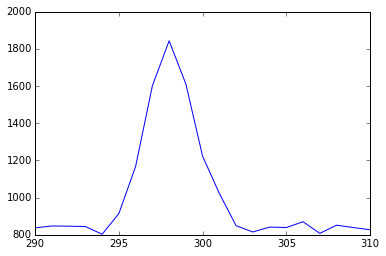

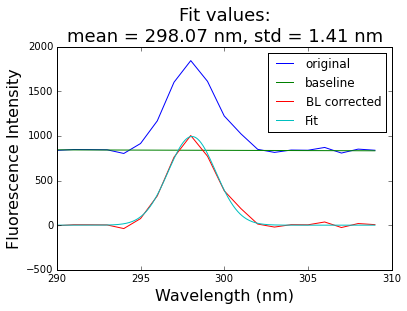

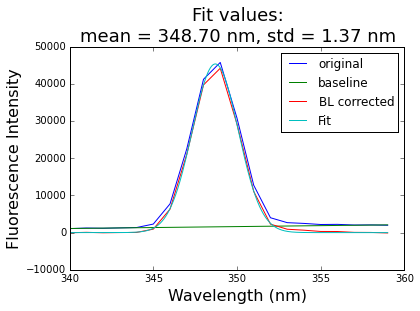

In [22]:
mypath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\Henry\\CalCheck300_160808_2.txt"
Ex300_2 = FluorSpec.PTI_Data.PTI_Data(mypath)
fig = figure()
#plot(Ex300_1.WL, Ex300_1.FileSpecCorrected)
plot(Ex300_2.WL, Ex300_2.FileSpecCorrected)
fit300 = fitpeak(Ex300_2.WL, Ex300_2.FileSpecCorrected, 290, 310, Gauss_cf, [2000, 298, 2], makefigs=True)

mypath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\Henry\\CalCheck350_160808.txt"
Ex350 = FluorSpec.PTI_Data.PTI_Data(mypath)
fit350 = fitpeak(Ex350.WL, Ex350.FileSpecCorrected, 340, 360, Gauss_cf, [10000, 348, 2], makefigs=True)

EmRelEx = np.mean([300 - fit300[0][1], 350 - fit350[0][1]])
UEmRelEx = np.sqrt(fit300[1][1]**2 + fit350[1][1]**2)
print("Relative offset between excitation and emission monochromator: {0} +/- {1} nm".format(EmRelEx, UEmRelEx))
ExMonoOffset = EmMonoOffset + EmRelEx
UExMonoOffset = np.sqrt(UEmRelEx**2 + UEmMonoOffset**2)
print("Absolute excitation monochromator offset = {0} +/- {1} nm".format(ExMonoOffset, UExMonoOffset))

# Now work out the filter response in the monochromator...

Initializing PTI_Data at Wed Aug 17 13:53:43 2016
Fitting peak: param guess = [0.001, 434, 2], model = <function Gauss_cf at 0x0000000008E050D0>
success! Parameters: [ 411.05145384  434.73485496    3.35567831]
Initializing PTI_Data at Wed Aug 17 13:53:43 2016
Fitting peak: param guess = [0.08, 434, 2], model = <function Gauss_cf at 0x0000000008E050D0>
success! Parameters: [  7.98436579e-02   4.36299967e+02   3.81388598e+00]
Mean location: 436.3415731008133


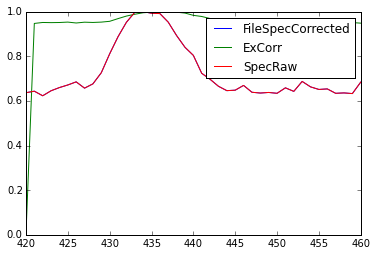

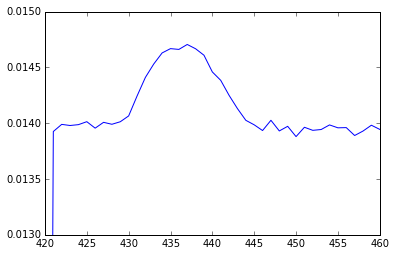

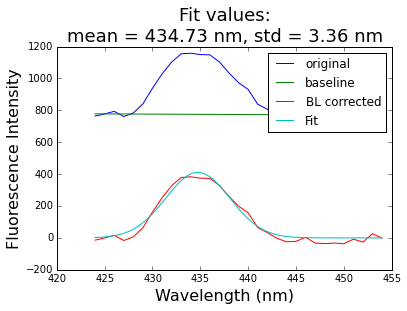

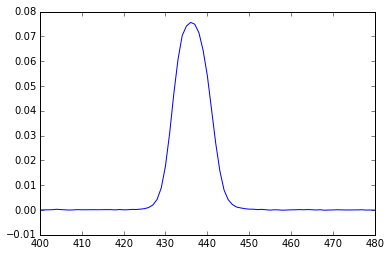

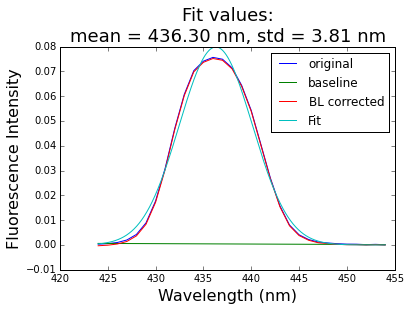

In [23]:
mypath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\Henry\\SyncScans\\BandPass440.txt"
Bandpass440_1 = FluorSpec.PTI_Data.PTI_Data(mypath)
fig = figure()
plot(Bandpass440_1.WL, np.array(Bandpass440_1.FileSpecCorrected)/max(Bandpass440_1.FileSpecCorrected), 
     label="FileSpecCorrected")
plot(Bandpass440_1.WL, np.array(Bandpass440_1.ExCorr)/max(Bandpass440_1.ExCorr), 
     label="ExCorr")
plot(Bandpass440_1.WL, np.array(Bandpass440_1.SpecRaw)/max(Bandpass440_1.SpecRaw), 
     label="SpecRaw")
legend()

fig = figure()
plot(Bandpass440_1.WL, Bandpass440_1.ExCorr, label="ExCorr")
ylim(0.013,0.015)

fitbandpass_1 = fitpeak(Bandpass440_1.WL, Bandpass440_1.FileSpecCorrected, 424, 455, Gauss_cf, [0.001, 434, 2], makefigs=True)

mypath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\Henry\\SyncScans\\BandPass440_2.txt"
Bandpass440_2 = FluorSpec.PTI_Data.PTI_Data(mypath)
fig = figure()
plot(Bandpass440_2.WL, Bandpass440_2.ExCorr, label="ExCorr")

fitbandpass_2 = fitpeak(Bandpass440_2.WL, Bandpass440_2.ExCorr, 424, 455, Gauss_cf, [0.08, 434, 2], makefigs=True)

MeanBandpass_2 = sum(np.array(Bandpass440_2.WL)*np.array(Bandpass440_2.ExCorr))/sum(Bandpass440_2.ExCorr)
print("Mean location: {0}".format(MeanBandpass_2))

# Now for the UV-VIS bandpass filter measurements

["C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\UVVIS_160805\\filter\\440nmbandpassFilter90deg_3pm_1.txt", "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\UVVIS_160805\\filter\\440nmbandpassFilter90deg_3pm_2.txt", "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\UVVIS_160805\\filter\\440nmbandpassFilter90deg_3pm_3.txt", "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\UVVIS_160805\\filter\\440nmbandpassFilter90deg_3pm_4.txt", "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\UVVIS_160805\\filter\\440nmbandpassFilter90deg_3pm_5.txt"]
[437.5, 437.5, 437.60000000000002, 437.60000000000002, 437.69999999999999]
Fitting peak: param guess = [0.07, 437, 5], model = <function Gauss_cf at 0x0000000008E050D0>
success! Parameters: [  6.04261591e-02   4.37789775e+02   2.89943736e+00]
Fitting peak: param guess = [0.07, 437, 5], model = <function Gauss_cf at 0x0000000008E050D0>
success! Parameters: [  6.04261591e-02   4.37789775e+02   2.89943736e+00]
Fitting 

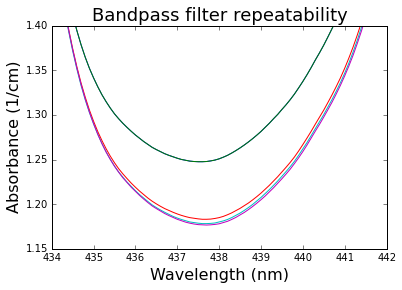

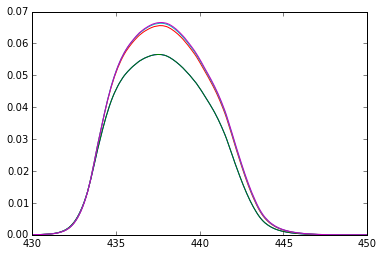

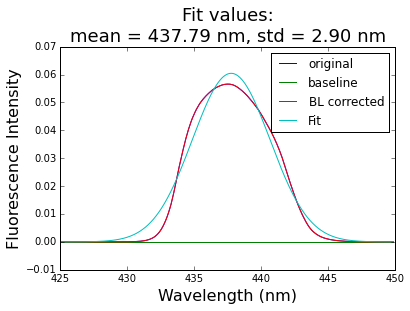

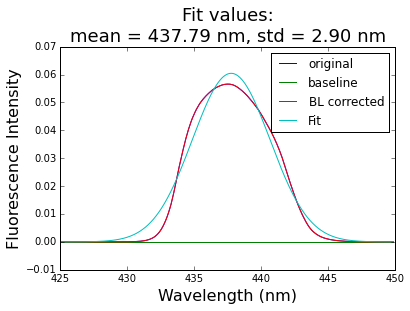

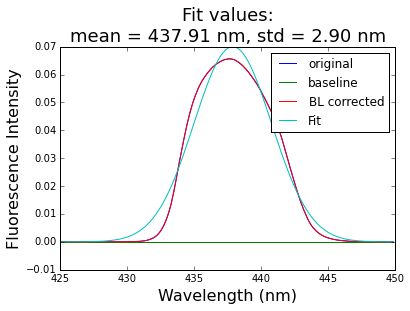

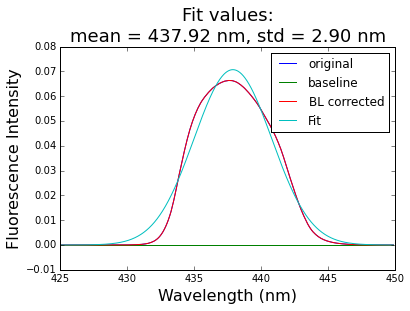

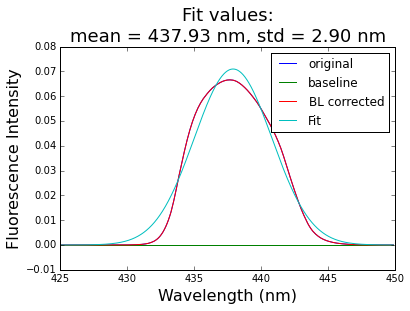

In [24]:
UVpaths = ["C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\UVVIS\
_160805\\filter\\440nmbandpassFilter90deg_3pm_{0}.txt".format(i+1) for i in range(5)]
print(UVpaths)
filterUVdata = [ReadUVVIS_nocorr(path) for path in UVpaths]
figure()
[plot(filterUVdata[i][0], filterUVdata[i][1], label = "Measurement {0}".format(i)) for i in range(len(filterUVdata))]
#legend()
xlim(434,442)
ylim(1.15,1.4)
xlabel("Wavelength (nm)", fontsize=16)
ylabel("Absorbance (1/cm)", fontsize=16)
title("Bandpass filter repeatability", fontsize=18)
minWL = [filterUVdata[i][0][list(filterUVdata[i][1]).index(min(filterUVdata[i][1]))] for i in range(len(filterUVdata))]
print(minWL)
WLvals = filterUVdata[0][0]
RelIntensities = [10**-filterUVdata[i][1] for i in range(len(filterUVdata))]
fig = figure()
[plot(WLvals, RelIntensities[i]) for i in range(len(RelIntensities))]
xlim(430,450)

UVbandpassfitreturns = [fitpeak(list(WLvals), list(spec), 425, 450, Gauss_cf, [0.07, 437, 5], makefigs=True) 
                        for spec in RelIntensities]

UVbandpassMeans = [sum(WLvals*spec)/sum(spec) for spec in RelIntensities]
print("UV Mean locations: {0}".format(UVbandpassMeans))
print("UV filter centre = {0} +/- {1} nm".format(np.mean(UVbandpassMeans), np.std(UVbandpassMeans)))

# Summary of shift results:

- The absolute Emission monochromator scale is off by -2.81 +/- 0.36 nm.

- The absolute Excitation monochromator scale is off by -1.20 +/- 0.36 nm

- The mean wavelength of the filter coming out of the emission monochromator (measured by ExCorr) is 436.34 nm

- The mean wavelength of the filter measured in the UV-VIS is 438.00 +/- 0.07 nm

- So, there is an offset of 1.66 nm between the emission monochromator and the UV-VIS. So if I excite in the monochromator at 300 nm, the absorption length I should us is the one I measured at 301.66 nm.

# Using Sm as a wavelength calibration:
(It has many sharp lines in the visible and is often used as a calibration standard (though less frequently than Ho).

Minfang just happened to have a 1000 ug/mL Sm standard solution (in 5% HNO3).

Fitting peak: param guess = [0.02, 361, 2], model = <function Gauss_cf at 0x0000000008E050D0>
success! Parameters: [  2.01537666e-02   3.62381459e+02   1.74200713e+00]
Fitting peak: param guess = [0.05, 374, 2], model = <function Gauss_cf at 0x0000000008E050D0>
success! Parameters: [  2.05382868e-02   3.74279735e+02   1.76193116e+00]
Fitting peak: param guess = [0.1, 401, 2, 0.02, 407, 2, 0.02, 417, 2], model = <function TripleGauss_cf at 0x0000000008E85A60>
success! Parameters: [  9.88880529e-02   4.01428187e+02   1.78419150e+00   1.52112211e-02
   4.07293409e+02   1.29788161e+00   1.66041073e-02   4.16325875e+02
   2.15261514e+00]
Fitting peak: param guess = [0.02, 463, 2, 0.02, 475, 2, 0.02, 480, 2], model = <function TripleGauss_cf at 0x0000000008E85A60>
success! Parameters: [  1.64134574e-02   4.63452694e+02   2.35313382e+00  -4.51752088e-03
   4.71848161e+02   3.45439887e+00   2.13609093e-02   4.77178160e+02
   5.84458308e+00]


C:\Users\lbignell\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:56: RuntimeWarning: invalid value encountered in sqrt


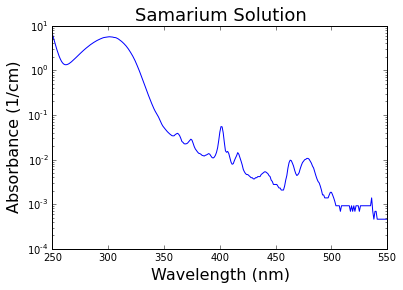

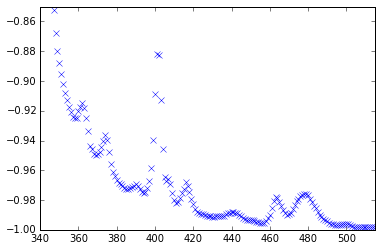

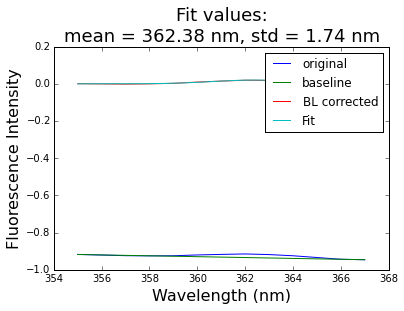

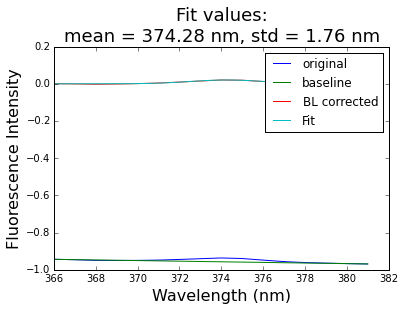

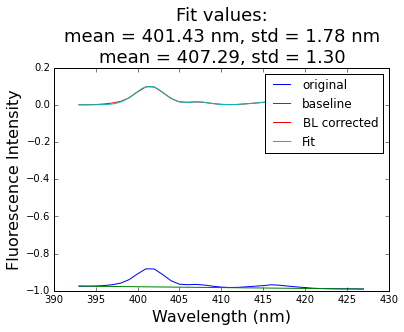

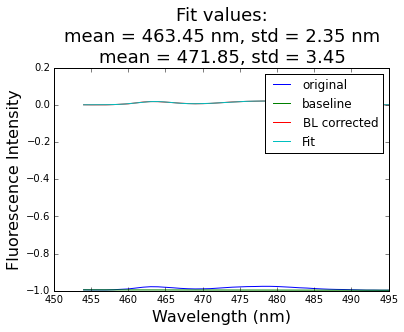

In [25]:
UVpath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\UVVIS\
_160805\\WLcalib\\SmNO3_Std.txt"
SmUVdata = ReadUVVIS_nocorr(UVpath)
figure()
plot(SmUVdata[0], SmUVdata[1], label = "Samarium Solution")
xlim(250, 550)
#ylim(1.15,1.4)
xlabel("Wavelength (nm)", fontsize=16)
ylabel("Absorbance (1/cm)", fontsize=16)
title("Samarium Solution", fontsize=18)
yscale("log")
#minWL = [filterUVdata[i][0][list(filterUVdata[i][1]).index(min(filterUVdata[i][1]))] for i in range(len(filterUVdata))]
#print(minWL)
WLvals = SmUVdata[0]
RelIntensities = 10**-SmUVdata[1]
fig = figure()
plot(WLvals, -RelIntensities, 'x')
xlim(340,515)
ylim(-1, -0.85)
startranges = [355, 366, 393, 454]
endranges = [368, 382, 428, 496]
paramguesses = [[0.02, 361, 2], [0.05, 374, 2], [0.1, 401, 2, 0.02, 407, 2, 0.02, 417, 2],
               [0.02, 463, 2, 0.02, 475, 2, 0.02, 480, 2]]
models = [Gauss_cf, Gauss_cf, TripleGauss_cf, TripleGauss_cf]


Smfitreturns = [fitpeak(list(WLvals), list(-RelIntensities), startranges[i], endranges[i], models[i], paramguesses[i],
                        makefigs=True, avglen=2) for i in range(len(startranges))]

#UVbandpassMeans = [sum(WLvals*spec)/sum(spec) for spec in RelIntensities]
#print("UV Mean locations: {0}".format(UVbandpassMeans))
#print("UV filter centre = {0} +/- {1} nm".format(np.mean(UVbandpassMeans), np.std(UVbandpassMeans)))

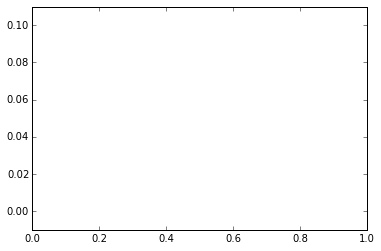

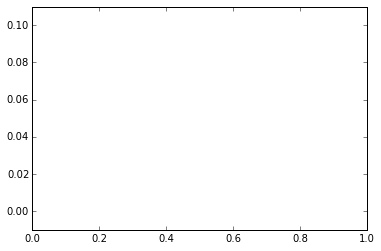

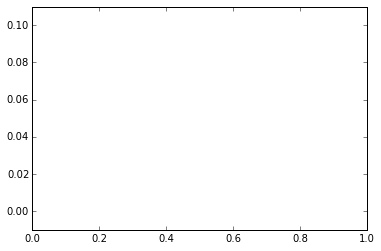

In [26]:
for i in range(6):
    if i<3:
        continue
    figure(i)
    #xlim(430,500)
    ylim(-0.01, 0.11)

Initializing PTI_Data at Wed Aug 17 13:54:01 2016
Initializing PTI_Data at Wed Aug 17 13:54:01 2016
Initializing PTI_Data at Wed Aug 17 13:54:01 2016


(-0.02, 0.04)

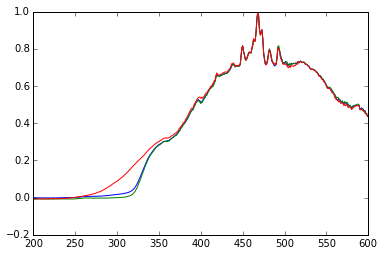

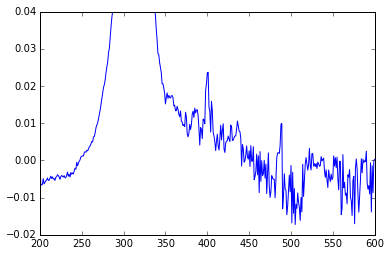

In [27]:
mypaths = ["C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\Henry\\Emission\\WLcalib\\SmStd_{0}.txt".format(i+1)
           for i in range(2)]
BLpath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\Henry\\Emission\\WLcalib\\NothingInBeam.txt"
SmData = [FluorSpec.PTI_Data.PTI_Data(path) for path in mypaths]
BLData = FluorSpec.PTI_Data.PTI_Data(BLpath)
fig = figure()
[plot(meas.WL, np.array(meas.ExCorr)/max(meas.ExCorr), label=meas.FilePath.split('\\')[-1]) for meas in SmData]
plot(BLData.WL, np.array(BLData.ExCorr)/max(BLData.ExCorr), label=BLData.FilePath.split("\\")[-1])

fig = figure()
plot(BLData.WL, np.array(BLData.ExCorr)/max(BLData.ExCorr) - np.array(SmData[0].ExCorr)/max(SmData[0].ExCorr), 
     label="Difference")
ylim(-0.02, 0.04)

## So, the standard solution isn't concentrated enough.

- Also the peak at ~300 nm isn't from Sm; it's probably the NO3.

- Used SmCl3.6H2O to make 0.02 g/mL solution (20x more concentrated) to measure. Results below...

In [104]:
%matplotlib qt

(200, 600)

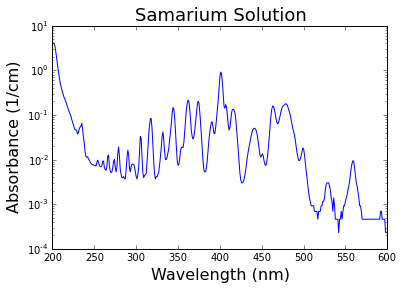

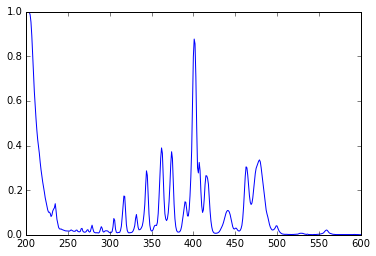

In [28]:
UVpath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\UVVIS\
_160805\\WLcalib\\SmNO3_0.02gmL.txt"
SmUVdata = ReadUVVIS_nocorr(UVpath)
figure()
plot(SmUVdata[0], SmUVdata[1], label = "Samarium Solution")
xlim(200, 600)
#ylim(1.15,1.4)
xlabel("Wavelength (nm)", fontsize=16)
ylabel("Absorbance (1/cm)", fontsize=16)
title("Samarium Solution", fontsize=18)
yscale("log")
#minWL = [filterUVdata[i][0][list(filterUVdata[i][1]).index(min(filterUVdata[i][1]))] for i in range(len(filterUVdata))]
#print(minWL)
WLvals = SmUVdata[0]
RelIntensities = 10**-SmUVdata[1]
fig = figure()
plot(WLvals, 1-RelIntensities)#, 'x')
xlim(200,600)
#yscale("log")
#ylim(-1, -0.85)
#startranges = [355, 366, 393, 454]
#endranges = [368, 382, 428, 496]
#paramguesses = [[0.02, 361, 2], [0.05, 374, 2], [0.1, 401, 2, 0.02, 407, 2, 0.02, 417, 2],
#               [0.02, 463, 2, 0.02, 475, 2, 0.02, 480, 2]]
#models = [Gauss_cf, Gauss_cf, TripleGauss_cf, TripleGauss_cf]


#Smfitreturns = [fitpeak(list(WLvals), list(-RelIntensities), startranges[i], endranges[i], models[i], paramguesses[i],
#                        makefigs=True, avglen=2) for i in range(len(startranges))]


In [111]:
ylim(0,0.05)

(0, 0.05)

Initializing PTI_Data at Wed Aug 17 13:54:13 2016
Initializing PTI_Data at Wed Aug 17 13:54:13 2016


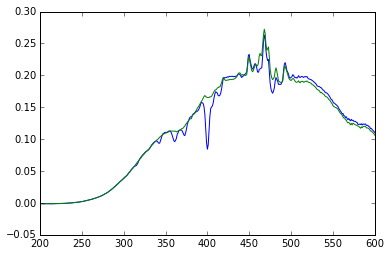

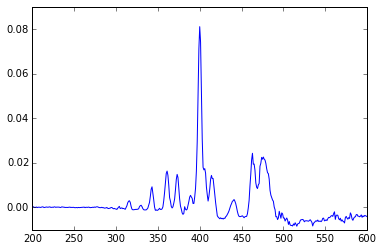

In [29]:
mypath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\Henry\\Emission\\WLcalib\\SmCl3_1.txt"
BLpath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\Henry\\Emission\\WLcalib\\water.txt"
SmData = FluorSpec.PTI_Data.PTI_Data(mypath)
BLData = FluorSpec.PTI_Data.PTI_Data(BLpath)
fig = figure()
plot(SmData.WL, np.array(SmData.ExCorr), label=SmData.FilePath.split('\\')[-1])
plot(BLData.WL, np.array(BLData.ExCorr), label=BLData.FilePath.split("\\")[-1])

fig = figure()
plot(BLData.WL, np.array(BLData.ExCorr) - np.array(SmData.ExCorr), 
     label="Difference")
#ylim(-0.02, 0.04)

(300, 500)

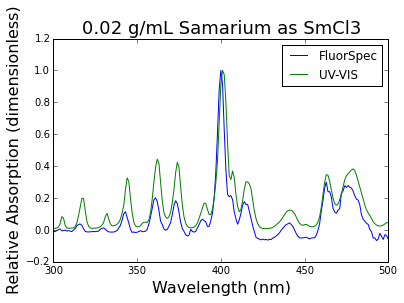

In [30]:
fig = figure()
signal = np.array(BLData.ExCorr) - np.array(SmData.ExCorr)
plot(BLData.WL, signal/max(signal[100:500]), label="FluorSpec")
plot(WLvals, (1-RelIntensities)/max(1-RelIntensities[100:500]), label="UV-VIS")
xlabel("Wavelength (nm)", fontsize=16)
ylabel("Relative Absorption (dimensionless)", fontsize=16)
title("0.02 g/mL Samarium as SmCl3", fontsize=18)
legend()
xlim(300,500)

### It's clear from the plot above that only some peaks are worth fitting. They seem to be at about:

316 nm, 330 nm, 343 nm, 360 nm, 373 nm, 390 nm (unresolved), 400 nm, 408 nm (unresolved), and 413/416 nm (unresolved).

The unresolved peaks may or may not be helpful in their own right, but they're at least needed to be a part of the fit for the big 400 nm peak.

Fitting peak: param guess = [0.2, 316, 2], model = <function Gauss_cf at 0x0000000008E050D0>
success! Parameters: [  1.69739240e-01   3.17269295e+02   1.64634328e+00]
Fitting peak: param guess = [0.1, 332, 2, 0.3, 344, 2], model = <function DoubleGauss_cf at 0x0000000008D83D90>
success! Parameters: [  7.41069143e-02   3.31792342e+02   1.41686587e+00   2.63569548e-01
   3.44167049e+02   1.85250749e+00]
Fitting peak: param guess = [0.02, 353, 2, 0.4, 362, 2, 0.4, 374, 2], model = <function TripleGauss_cf at 0x0000000008E85A60>
success! Parameters: [  2.55779748e-02   3.54326114e+02   1.45641738e+00   3.69341153e-01
   3.62043856e+02   2.29420271e+00   3.46165846e-01   3.73988428e+02
   2.19353635e+00]
Fitting peak: param guess = [0.1, 390, 3, 1, 401, 2, 0.1, 408, 2, 0.1, 414, 2, 0.1, 417, 2], model = <function FiveGauss_cf at 0x0000000008D3A9D8>
success! Parameters: [  1.23725772e-01   3.90786380e+02   2.98423360e+00   8.74943707e-01
   4.01229296e+02   2.52305534e+00   1.89778717e-01   

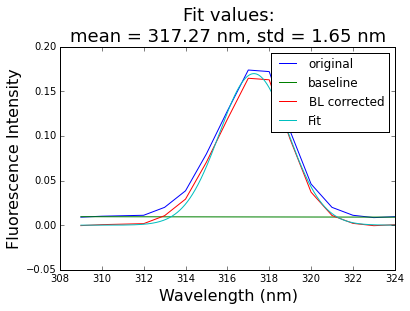

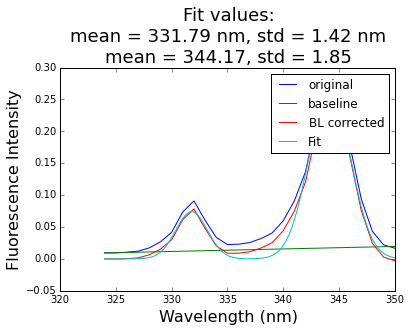

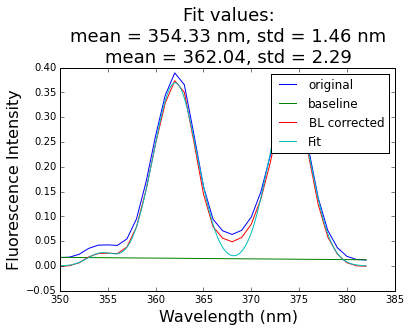

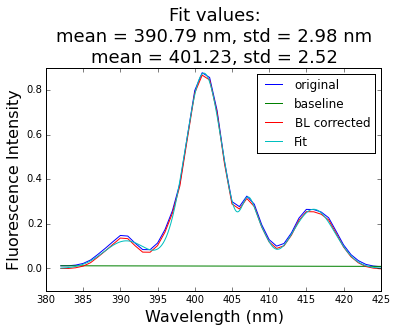

In [31]:
#UVdata fits
startranges = [309, 324, 350, 382]
endranges = [325, 351, 383, 426]
paramguesses = [[0.2, 316, 2], [0.1, 332, 2, 0.3, 344, 2], [0.02, 353, 2, 0.4, 362, 2, 0.4, 374, 2],
               [0.1, 390, 3, 1, 401, 2, 0.1, 408, 2, 0.1, 414, 2, 0.1, 417, 2]]
models = [Gauss_cf, DoubleGauss_cf, TripleGauss_cf, FiveGauss_cf]


Smfitreturns = [fitpeak(list(WLvals), list(1-RelIntensities), startranges[i], endranges[i], models[i], paramguesses[i],
                        makefigs=True, avglen=2) for i in range(len(startranges))]


Fitting peak: param guess = [0.04, 315, 2], model = <function Gauss_cf at 0x0000000008E050D0>
success! Parameters: [  4.01123387e-03   3.15545043e+02   1.73210334e+00]
Fitting peak: param guess = [0.02, 330, 2, 0.12, 343, 2], model = <function DoubleGauss_cf at 0x0000000008D83D90>
success! Parameters: [  2.00887577e-03   3.29596694e+02   1.43743300e+00   1.01613071e-02
   3.42684817e+02   1.78803860e+00]
Fitting peak: param guess = [0.2, 360, 2, 0.2, 372, 2], model = <function DoubleGauss_cf at 0x0000000008D83D90>
success! Parameters: [  1.76612182e-02   3.60917860e+02   2.28959871e+00   1.67604227e-02
   3.73076430e+02   2.19334800e+00]
Fitting peak: param guess = [0.05, 389, 3, 1, 400, 2, 0.02, 406, 2, 0.1, 413, 2, 0.1, 417, 2], model = <function FiveGauss_cf at 0x0000000008D3A9D8>
success! Parameters: [  6.01066322e-03   3.91323754e+02   4.12442680e+00   8.25108469e-02
   4.00054198e+02   2.12364844e+00   1.93369486e-02   4.06374939e+02
   1.63081863e+00   1.76298998e-02   4.1423029

C:\Users\lbignell\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:56: RuntimeWarning: invalid value encountered in sqrt


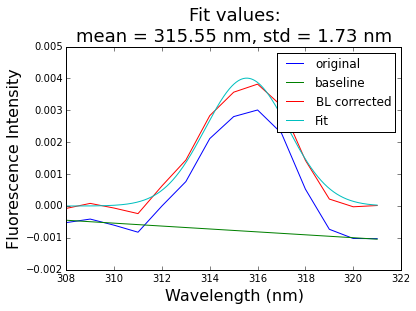

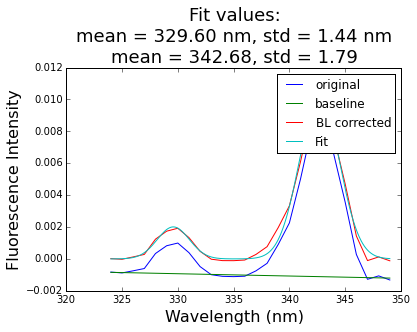

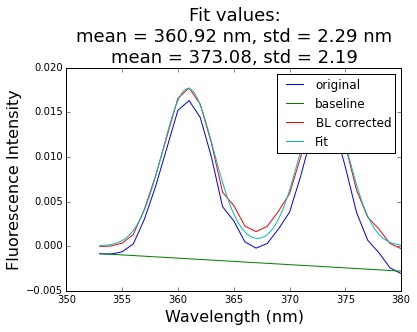

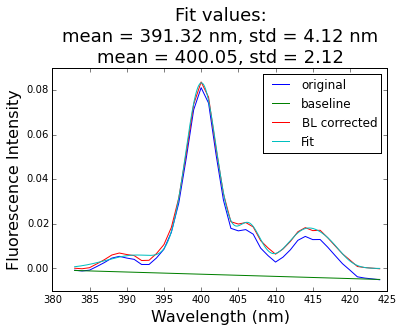

In [32]:
#FluorSpec fits
startranges = [308, 324, 353, 383]
endranges = [322, 350, 381, 425]
paramguesses = [[0.04, 315, 2], [0.02, 330, 2, 0.12, 343, 2], [0.2, 360, 2, 0.2, 372, 2],
               [0.05, 389, 3, 1, 400, 2, 0.02, 406, 2, 0.1, 413, 2, 0.1, 417, 2]]
models = [Gauss_cf, DoubleGauss_cf, DoubleGauss_cf, FiveGauss_cf]


Smfitreturns_Fluor = [fitpeak(list(BLData.WL), list(signal), startranges[i], endranges[i], models[i], paramguesses[i],
                        makefigs=True, avglen=2) for i in range(len(startranges))]


In [33]:
print(Smfitreturns_Fluor)
print(Smfitreturns)

[(array([  4.01123387e-03,   3.15545043e+02,   1.73210334e+00]), array([ 0.00014966,  0.07461894,  0.07462275])), (array([  2.00887577e-03,   3.29596694e+02,   1.43743300e+00,
         1.01613071e-02,   3.42684817e+02,   1.78803860e+00]), array([ 0.00023948,  0.19787055,  0.19787075,  0.00021472,  0.04362869,
        0.04362887])), (array([  1.76612182e-02,   3.60917860e+02,   2.28959871e+00,
         1.67604227e-02,   3.73076430e+02,   2.19334800e+00]), array([ 0.00034517,  0.05166576,  0.0517338 ,  0.00035266,  0.05328769,
        0.05335959])), (array([  6.01066322e-03,   3.91323754e+02,   4.12442680e+00,
         8.25108469e-02,   4.00054198e+02,   2.12364844e+00,
         1.93369486e-02,   4.06374939e+02,   1.63081863e+00,
         1.76298998e-02,   4.14230295e+02,   2.68666845e+00,
         3.85921417e-03,   4.17748920e+02,   1.68638465e+00]), array([  5.89562161e-04,   7.44323299e-01,   8.01775802e-01,
         9.62211915e-04,   3.42495714e-02,   4.36712523e-02,
         9.66586

In [34]:
print(Smfitreturns[2][1][7])

0.0575629141625


Mean WL offset = -1.435870607439161 +/- 0.4283771528863679


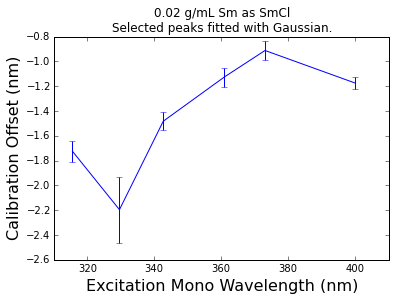

In [35]:
FluorPeaks = [Smfitreturns_Fluor[0][0][1], Smfitreturns_Fluor[1][0][1], Smfitreturns_Fluor[1][0][4], 
              Smfitreturns_Fluor[2][0][1], Smfitreturns_Fluor[2][0][4], Smfitreturns_Fluor[3][0][4]]#, 
#              Smfitreturns_Fluor[3][0][7]]
UVVISPeaks = [Smfitreturns[0][0][1], Smfitreturns[1][0][1], Smfitreturns[1][0][4], 
              Smfitreturns[2][0][4], Smfitreturns[2][0][7], Smfitreturns[3][0][4]]#, 
              #Smfitreturns[3][0][7]]
U_FluorPeaks = [Smfitreturns_Fluor[0][1][1], Smfitreturns_Fluor[1][1][1], Smfitreturns_Fluor[1][1][4], 
              Smfitreturns_Fluor[2][1][1], Smfitreturns_Fluor[2][1][4], Smfitreturns_Fluor[3][1][4]]#, 
#              Smfitreturns_Fluor[3][1][7]]
U_UVVISPeaks = [Smfitreturns[0][1][1], Smfitreturns[1][1][1], Smfitreturns[1][1][4], 
              Smfitreturns[2][1][4], Smfitreturns[2][1][7], Smfitreturns[3][1][4]]#, 
              #Smfitreturns[3][1][7]]
Offsets = [FluorPeaks[i] - UVVISPeaks[i] for i in range(len(FluorPeaks))]
U_Offsets = [np.sqrt(U_FluorPeaks[i]**2 + U_UVVISPeaks[i]**2) for i in range(len(U_FluorPeaks))]
print("Mean WL offset = {0} +/- {1}".format(np.mean(Offsets), np.std(Offsets)))
fig = figure()
errorbar(FluorPeaks, Offsets, yerr=U_Offsets)
xlabel("Excitation Mono Wavelength (nm)", fontsize=16)
ylabel("Calibration Offset (nm)", fontsize=16)
title("0.02 g/mL Sm as SmCl\nSelected peaks fitted with Gaussian.")

# This offset is now better known than it previously was (although there appears to be a systematic wavelength dependence). So, maybe taking the mean offset isn't valid?

## Maybe it's time to look again at the absolute measurements...

# Looking at the fluorescent light spectrum in the box.

Initializing PTI_Data at Wed Aug 17 13:53:31 2016
CWT wavelet approach...
Peaks found at: [402.0, 433.0, 487.0, 542.0]
Fitting peak: param guess = [20000, 402, 2], model = <function Gauss_cf at 0x0000000008E050D0>
success! Parameters: [  2.41250234e+04   4.01842484e+02   9.89412255e-01]
Fitting peak: param guess = [140000, 433, 2], model = <function Gauss_cf at 0x0000000008E050D0>
success! Parameters: [  1.53398837e+05   4.32639091e+02   9.86704159e-01]
Fitting peak: param guess = [100000, 538, 2, 140000, 544, 2, 40000, 548, 2], model = <function TripleGauss_cf at 0x0000000008E85A60>
success! Parameters: [  8.09781413e+04   5.40293701e+02   1.65396771e+00   6.56216659e+04
   5.43065186e+02   1.00737843e+00   3.56106903e+04   5.43488373e+02
   4.75547515e+00]


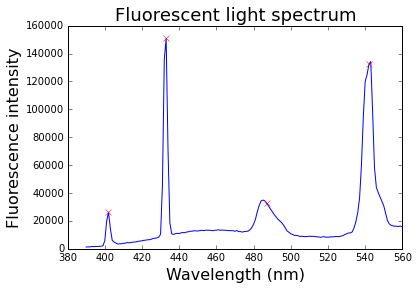

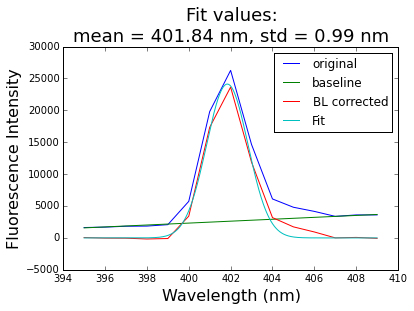

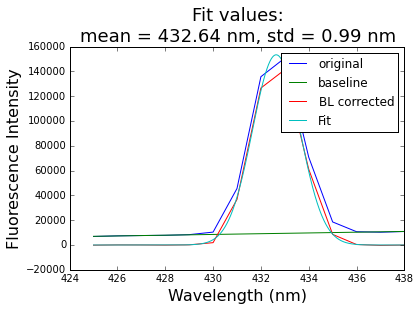

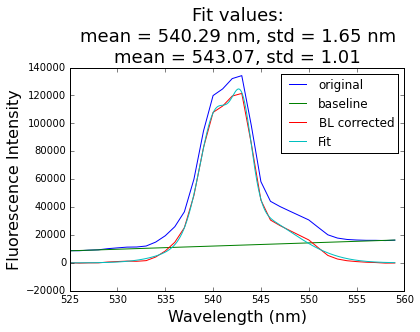

In [20]:
#%matplotlib qt4#Qt4Agg
from scipy.signal import find_peaks_cwt

mypath = "C:\\Users\\lbignell\\Desktop\\QY Project\\Henry's Data\\Henry\\FluoLights_2nm_160808.txt"
FluoLight = FluorSpec.PTI_Data.PTI_Data(mypath)
fig = figure()
plot(FluoLight.WL, FluoLight.FileSpecCorrected)
pk_ind = find_peaks_cwt(FluoLight.FileSpecCorrected, np.arange(7,8))
pk_WL =[FluoLight.WL[val] for val in pk_ind]
print("CWT wavelet approach...\nPeaks found at: {0}".format(pk_WL))
pk_sig = [FluoLight.FileSpecCorrected[val] for val in pk_ind]
plot(pk_WL, pk_sig, 'rx', linewidth=3)
#xlim(425,439)
xlabel("Wavelength (nm)", fontsize=16)
ylabel("Fluorescence intensity", fontsize=16)
title("Fluorescent light spectrum", fontsize=18)

startranges = [395, 425, 525]
endranges = [410, 439, 560]
paramguesses = [[20000, 402, 2], [140000, 433, 2], [100000, 538, 2, 140000, 544, 2, 40000, 548, 2]]
models = [Gauss_cf, Gauss_cf, TripleGauss_cf]
#pfit, pcov = fitpeak(FluoLight.WL, FluoLight.FileSpecCorrected, 395, 410, Gauss_cf, [20000, 402, 5], makefigs=True)
fitreturn = [fitpeak(FluoLight.WL, FluoLight.FileSpecCorrected, startranges[i], endranges[i], 
                        models[i], paramguesses[i], makefigs=True) for i in range(3)]
